<h1>Questions to be handed in for Applications of Integration</h1>

<p>Begin by loading our package for plotting, our root-finding package, and symbolic math package:</p>

In [1]:
using Plots
using Roots
using SymPy
using QuadGK

<p>We discuss a few applications of the integral.</p>

<h2>Area between two functions</h2>

<blockquote>
<p>The area between the two functions $f(x) > g(x)$ between $a$ and $b$</p>
</blockquote>

<p>is given by $\int_a^b (f(x) - g(x)) dx$.</p>

<p><a href="https://www.khanacademy.org/math/integral-calculus/indefinite-definite-integrals/definite_integrals/v/area-between-curves">Kahn academy</a></p>

<p>For example, let $f(x) = e^{-x}$ and $g(x) = x^2$. Find the area below $f$ and above $g(x)$ between $0$ and the first positive intersection point.</p>

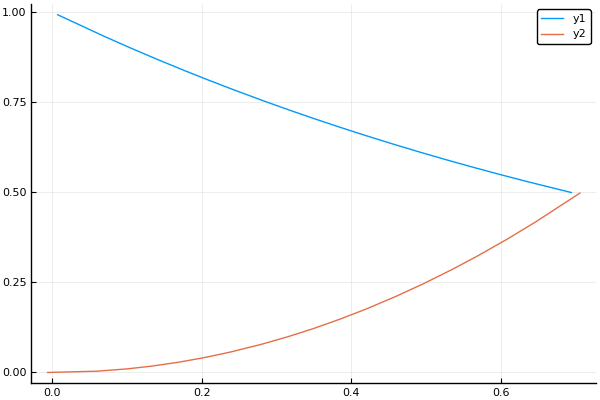

In [1]:
f(x) = exp(-x)
g(x) = x^2
h(x) = f(x) - g(x)
ip = find_zero(h, 1)
plot(f, 0, ip)
plot!(g)

<p>We can then find the area using <code>quadgk</code> to perform the (numeric) integration:</p>

In [1]:
quadgk(h, 0, ip)

(0.3890927851164812, 0.0)

<p>If you don't care about performance, you can avoid finding the zero through a trick like this:</p>

In [1]:
h(x) = f(x) - g(x) > 0 ? f(x) - g(x) : 0.0
quadgk(h, 0, 1)

(0.38909278887340365, 1.6320640461450628e-9)

<p>Just choose the endpoints of the integration so that you don't pick up extra area. In this case, you can easily plot to see that they don't cross again after <code>ip</code>, so any number greater will work.</p>

<p>(The performance is killed, because <code>quadgk</code> can possibly perform many function evaluations. When you put in a condition to check each time it can take much more time. In this example, though it isn't too much extra work, as the functions are well behaved.)</p>

<h2>Volume of solids of revolution</h2>

<blockquote>
<p>The volume of the [solid of</p>
</blockquote>

<p>revolution](http://en.wikipedia.org/wiki/Solid_of_revolution) found   by rotating the graph of $f(x)$ around the $x$ axis between $a$ and   $b$ is given by</p>


$$
Volume = \int_a^b \pi f(x)^2 dx.
$$


<p>For example, rotating the line $y=1+ x/10$ around the $x$ axis between $0$ and $5$ will produce a <a href="http://en.wikipedia.org/wiki/Frustum">frustum</a> of a cone. It has volume is given by:</p>

In [1]:
r(x) = 1 + x/10
v(x) = pi * r(x)^2
quadgk(v, 0, 5)

(24.870941840919194, 0.0)

<h2>Volumes with known cross-sections</h2>

<p>The above is a special case of the following:</p>

<blockquote>
<p>If $c(x)$ gives the cross sectional area of a volume at height $x$,</p>
</blockquote>

<p>then the total volume from $a$ to $b$ is given by </p>


$$
Volume = \int_a^b c(x) dx.
$$


<p>For example, if we let $y=1 + x/10$, again, but this time form squares with half distance given by $y$, the total volume becomes:</p>

In [1]:
r(x) = 1 + x/10
c(x) = (2r(x))^2		# area of square is d * d with d= 2r
quadgk(c, 0, 5)

(31.66666666666667, 0.0)

<p>This is a volume of a frustum of a pyramid with 4 sides, of which the previous partial cone would just fit inside. As such, this latter volume, 31.67, is greater than the previous. Even without this view, you would know this as the cross sectional squares are larger in area than the cross sectional circles formed by revolution. That is $\pi \cdot r(x)^2 < (2r(x))^2$.</p>

<h3>Questions</h3>

<h4>Area between two curves</h4>

<ul>
<li><p>Find the amount of area between $f(x) = x^3$ and $g(x) = x^4$ between $0$ and $1$.</p>
</li>
</ul>

<h4>Area between two curves</h4>

<ul>
<li><p>Find the area between the curves $\cos(x)$ and $\sin(x)$ between $-\pi$ and $\pi$ <strong>when</strong> $\cos(x) \geq \sin(x)$.</p>
</li>
</ul>

<h4>I like it – but how much does it weigh?</h4>

<ul>
<li><p>Look at the sculpture [Le</p>
</li>
</ul>

<p>Tamanoir](http://www.sculptureinternationalrotterdam.nl/collectie/permanent/LeTamanoir.php?lang=en) by Calder. A large scale work. How much does it weigh? Approximately?</p>

<p>Let's try to answer that with an educated guess. The right most figure looks to be about 1/5th the total amount. So if we estimate that piece and multiply by 5 we get a good guess. That part looks like an area of metal bounded by two quadratic polynomials. If we compute that area in square inches, then multiply by an assumed thickness of one inch, we have the cubic volume. The density of galvanized steel is 7850 kg/$m^3$ which we convert into pounds/in$^3$ via:</p>

In [1]:
7850 * 2.2 * (1/39.3)^3

0.28452123585283234

<p>The two parabolas, after rotating, might look like the following (with $x$ in inches):</p>


$$
f(x) = x^2/70 \quad g(x) = 35 + x^2/140
$$


<p>Put this altogether to give an estimated weight in pounds. Would you guess that the entire sculpture is more or less than a ton? two tons?</p>

<h4>Archimedes and areas related to parabolas</h4>

<ul>
<li><p>For any quadratic polynomial, Archimedes proved that the the area bounded by the secant line between $[a,b]$ is known multiple more than the area of the triangle constructed by connecting the points on the parabola at $x=a$, $x=b$ and $x=(a + b)/2$.  <a href="http://en.wikipedia.org/wiki/The_Quadrature_of_the_Parabola#mediaviewer/File:Parabola_and_inscribed_triangle.svg">Figure</a></p>
<p>We want to find that multiple. Since it doesn't depend on the parabola, $a$ or $b$, take $f(x) = x^2$, $a=-2$ and $b=1$.</p>
</li>
</ul>

<p>Here is how we can compute the area bounded by the secant line between $a$ and $b$ and the parabola:</p>

In [1]:
f(x) = x^2
a,b = -2, 1
mid = (a + b)/2
secant(f, a, b) = x->f(a) + (f(b)-f(a))/(b-a)*(x-a)
topline = secant(f,a,b)
h(x) = topline(x) - f(x)
a, err = quadgk(h, a, b)

(4.5, 8.881784197001252e-16)

<p>Now compute the other area of the triangle and take a ratio to find the answer.</p>

<h4>Area between two curves</h4>

<ul>
<li><p>Center a square of width 2 at the origin. Find the area of all points $(x,y)$ where the distance to the origin is less than the distance to the boundary of the square.</p>
</li>
</ul>

<p>The symmetry of a graph will show that it might pay to focus on the region given by $y > |x|$ for which the closest edge is the top, so for a point $(x,y)$ in that region, the curve satisfies $1 - y = \sqrt{x^2 + y^2}$ which you can solve symbolically through:</p>

In [1]:
@vars x y
solve(1-y-sqrt(x^2+y^2), y)

<p>What is the total area? Is it more than half the total area?</p>

<h4>Volumes <small>rotated catenary</small></h4>

<ul>
<li><p>Let $f(x; a) = a \cdot \cosh(x/a)$. For $a=0.5$ find the volume of the figure of revolution if the graph of $f$ is rotated around the $x$ axis between $-a$ and $a$.</p>
</li>
</ul>

<h4>Volume of a watermelon</h4>

<ul>
<li><p>A watermelon is modeled as an ellipsoid – the solid formed by rotating an ellipse. Suppose the dimensions of a particular watermelon has a major axis of 30cm and a minor axis of 20 cm. What is the volume in cubic centimeters? What is the weight if 1000 cubic centimeters weighs $(2/3) \cdot 2.2$ pounds (about 2/3rd the weight of plain water).</p>
<p>(You might model the watermelon via $(x/15)^2  + (y/10)^2 = 1$ and rotate about the $x$ axis..)</p>
</li>
</ul>

<h4>Volume of a dome</h4>

<p>The Onion Domes of <a href="http://en.wikipedia.org/wiki/Saint_Basil&#39;s_Cathedral">Saint Basil's Cathedral</a> are iconic figures.  There are theories as to the origins of the shape, such as they don't hold snow and they give more mass to support the large crosses on top of them.</p>

<p>These domes can be viewed as solids of revolution.  We model the relationship using functions presented <a href="http://math.clarku.edu/~djoyce/ma131/surfaces.pdf">here</a>, only scaled to more closely match reality.  The functional form presented is equivalent to</p>


$$
r(y) = A \cdot (1 + \cos(y/B)),
$$


<p>where the radius $r(0)$ is equal to 20 and the height satisfies $(\pi+ \pi/3) \cdot B = 40$. The dome is modeled by the solid of revolution formed by rotating the above curve around the $y$ axis from $-10$ to $30$. If the units are in feet, what is the volume of the dome?</p>

<h4>Volumes <small>Washington Monument</small></h4>

<ul>
<li><p>The <a href="http://en.wikipedia.org/wiki/Washington_Monument">Washington Monument</a> is the world's tallest stone structure.</p>
</li>
</ul>

<p>The basic shape is the 500 foot high base consists of square cross sections with diameter tapering down linearly from 126 feet to 40 feet. In the last 55 feet it is a square-based pyramid.</p>

<p>The cross section as a function of height, $x$, can be written in terms of the following function, $f$ as $c(x) = (2f(x))^2$.</p>

In [1]:
f(x) = x < 500 ? 126.0 + (40-126)/(500-0)*x : 40.0 + (0 - 40)/(55-0)*(x-500)

f (generic function with 1 method)

<p>Find the total volume in cubic feet.</p>

<h4>Volumes <small>rotating a trapped area</small></h4>

<ul>
<li><p>A generalization of solid of revolution consists of rotating a region bounded between $g(x) < f(x)$ around the $x$ asis. Such a solid with have volume $V =\int_a^b \pi(f(x)^2 - g(x)^2) dx$, as might be guessed.</p>
</li>
</ul>

<p>A ball of radius $1$ has a core taken out of it with radius $1/2$. Find the remaining volume. (This is a solid of revolution for the functions $f(x) = \sqrt{1-x^2}$ and $g(x) = 1/2$, but the $a$ and $b$ need determining.)</p>

<h4>An AP calculus exam question</h4>

<ul>
<li><p>Let $R$ be the region enclosed by the graph $f(x) = x^4 - 2.3x^3 + 4$ and the horizontal line $y=4$, as shown by</p>
</li>
</ul>

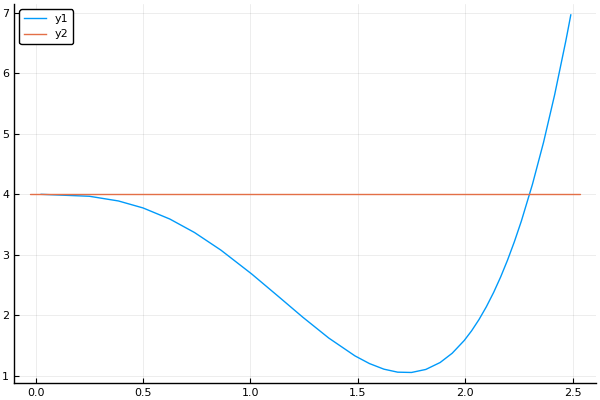

In [1]:
f(x) = x^4 - 2.3x^3 + 4
g(x) = 4
plot(f, 0, 2.5)
plot!(g)

<ol>
<li><p>Find the volume of the solid generated when $R$ is rotated about</p>
</li>
</ol>

<p>the horizontal line $y=-2$.</p>

<ol start="2">
<li><p>Region $R$ is the base of a solid. For this solid, each cross</p>
</li>
</ol>

<p>section perpendicular to the $x$-axis is an isosceles right triangle with a leg in $R$. Find the volume of the solid.</p>